In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = load_iris(as_frame=True).frame
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>,
        <Axes: title={'center': 'petal length (cm)'}>],
       [<Axes: title={'center': 'petal width (cm)'}>,
        <Axes: title={'center': 'target'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

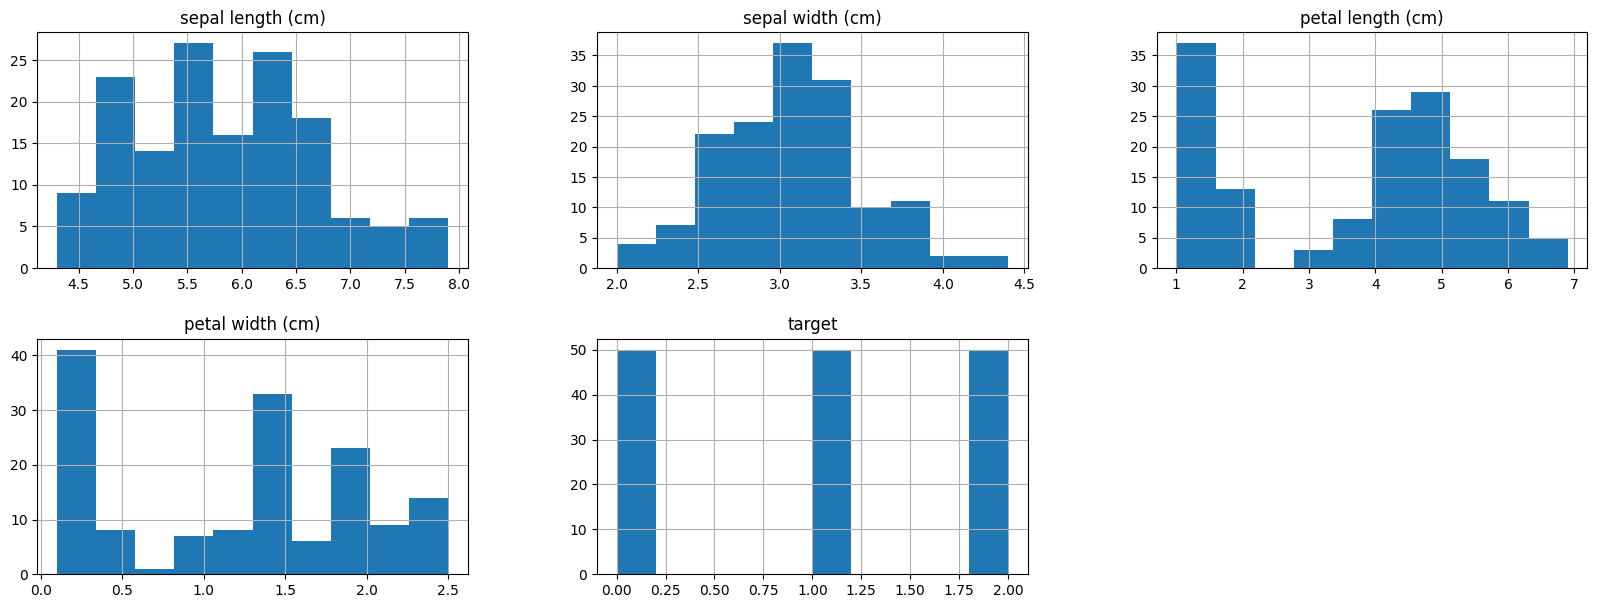

In [5]:
df.hist(bins=10, figsize=(20,15), layout=(4,3))

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


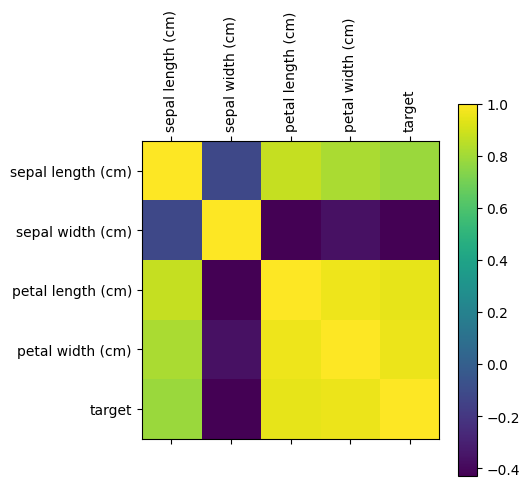

In [9]:
corr = df.corr()
print(corr)
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

# Inference
Petal width and length are highly correlated to the target

In [10]:
df.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64

In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
log_reg_pipe = pipeline.Pipeline(
    [
        ("scaler", StandardScaler()),
        ("regressor", LogisticRegression())
    ]
)

In [27]:
log_reg_pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LogisticRegression())])

In [28]:
y_pred = log_reg_pipe.predict(X_test)

In [29]:
r2_score(Y_test, y_pred)

1.0

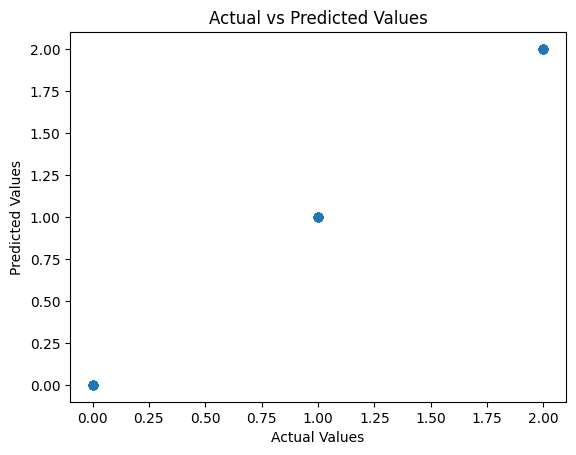

In [30]:
#Plots
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [31]:
#Scores
print("R2 Score:", r2_score(Y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(Y_test, y_pred))
print("Root Mean Squared Error:", root_mean_squared_error(Y_test, y_pred))

R2 Score: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0


In [34]:
#regression equation
coefficients = log_reg_pipe.named_steps['regressor'].coef_
intercept = log_reg_pipe.named_steps['regressor'].intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Regression Equation: Y =", intercept, "+", coefficients[0], "* X1 +", coefficients[1], "* X2 + ...")

Coefficients: [[-1.00316587  1.14487318 -1.8113482  -1.69251025]
 [ 0.52799044 -0.28319987 -0.34060665 -0.72013959]
 [ 0.47517543 -0.86167331  2.15195485  2.41264984]]
Intercept: [-0.13377225  1.98264649 -1.84887424]
Regression Equation: Y = [-0.13377225  1.98264649 -1.84887424] + [-1.00316587  1.14487318 -1.8113482  -1.69251025] * X1 + [ 0.52799044 -0.28319987 -0.34060665 -0.72013959] * X2 + ...


In [36]:
#sample prediction
sample_flower = [5.1, 3.5, 1.4, 4.2]
sample_flower = np.array(sample_flower).reshape(1, -1)
predicted_species = log_reg_pipe.predict(sample_flower)
print("Predicted species for sample flower:", predicted_species)

Predicted species for sample flower: [2]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
